In [1]:
import json

In [2]:
with open("./final results/benchmark-results-DYTAS[navigation=All,sorting=DFS,multicore=SkipActiveProcessors].json") as f:
    data = json.load(f)

In [3]:
# data

In [4]:
import pandas as pd

In [5]:
df = pd.json_normalize(data, sep='.')

In [6]:
df.head()

,dag,system,scheduler,completed,makespan,exec_time,run_stats.scheduling_time,run_stats.total_task_time,run_stats.total_network_traffic,run_stats.total_network_time,...,run_stats.max_used_memory,run_stats.max_cpu_utilization,run_stats.max_memory_utilization,run_stats.cpu_utilization,run_stats.memory_utilization,run_stats.used_resource_count,run_stats.cpu_utilization_used,run_stats.memory_utilization_used,run_stats.cpu_utilization_active,run_stats.memory_utilization_active
0,1000-epigenomics-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,4185.052686,0.193185,0.054783,5.779685e+04,2.032439e+04,1.913252,...,0,0.182879,0.0,0.053737,0.0,33,0.053737,0.0,0.124920,0.0
1,1000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,5093.949016,0.258228,0.063212,1.664369e+05,1.079475e+06,86.885087,...,0,0.338521,0.0,0.127134,0.0,33,0.127134,0.0,0.131385,0.0
2,1000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,10422.909339,0.324302,0.169933,4.311437e+05,7.158204e+04,6.086463,...,0,0.774319,0.0,0.160953,0.0,33,0.160953,0.0,0.164910,0.0
3,10000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,46238.275727,11.516822,6.088867,3.339446e+06,8.800677e+05,74.689816,...,0,0.871595,0.0,0.281022,0.0,33,0.281022,0.0,0.283348,0.0
4,101000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,510868.358477,1540.672734,1379.372240,1.648880e+07,1.086890e+08,8819.404617,...,0,0.354086,0.0,0.125588,0.0,33,0.125588,0.0,0.125637,0.0


In [7]:
nodes_regex = r"(\d+)-" # Extract node count regex

In [8]:
df["nodes"] = df["dag"].str.extract(nodes_regex)

In [9]:
workflow_regex = r'^\d+-(\w+)-workflow$'

In [10]:
df["workflow"] = df["dag"].str.extract(workflow_regex)

In [11]:
df.head()

,dag,system,scheduler,completed,makespan,exec_time,run_stats.scheduling_time,run_stats.total_task_time,run_stats.total_network_traffic,run_stats.total_network_time,...,run_stats.max_memory_utilization,run_stats.cpu_utilization,run_stats.memory_utilization,run_stats.used_resource_count,run_stats.cpu_utilization_used,run_stats.memory_utilization_used,run_stats.cpu_utilization_active,run_stats.memory_utilization_active,nodes,workflow
0,1000-epigenomics-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,4185.052686,0.193185,0.054783,5.779685e+04,2.032439e+04,1.913252,...,0.0,0.053737,0.0,33,0.053737,0.0,0.124920,0.0,1000,epigenomics
1,1000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,5093.949016,0.258228,0.063212,1.664369e+05,1.079475e+06,86.885087,...,0.0,0.127134,0.0,33,0.127134,0.0,0.131385,0.0,1000,genome
2,1000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,10422.909339,0.324302,0.169933,4.311437e+05,7.158204e+04,6.086463,...,0.0,0.160953,0.0,33,0.160953,0.0,0.164910,0.0,1000,montage
3,10000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,46238.275727,11.516822,6.088867,3.339446e+06,8.800677e+05,74.689816,...,0.0,0.281022,0.0,33,0.281022,0.0,0.283348,0.0,10000,montage
4,101000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,510868.358477,1540.672734,1379.372240,1.648880e+07,1.086890e+08,8819.404617,...,0.0,0.125588,0.0,33,0.125588,0.0,0.125637,0.0,101000,genome


In [12]:
df["nodes"] = df["nodes"].astype(int)

In [13]:
df = df.sort_values("nodes")

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

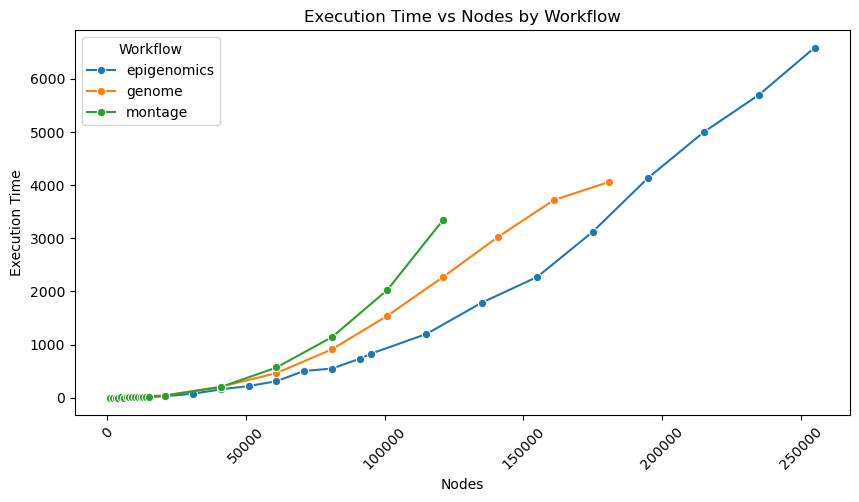

In [15]:
plt.figure(figsize=(10,5))

sns.lineplot(data=df, x='nodes', y='exec_time', hue='workflow', marker='o')

plt.title('Execution Time vs Nodes by Workflow')
plt.xlabel('Nodes')
plt.ylabel('Execution Time')
plt.legend(title='Workflow')
plt.xticks(rotation=45)
plt.show()

Attempting to see what big O notation fits each case.

In [16]:
import numpy as np
from scipy.optimize import curve_fit

In [17]:
# Define power-law function: O(t^p)
def power_law(t, p, c):
    return c * np.power(t, p)

# Define exponential function: O(e^(b*t))
def exponential_fit(t, a, b):
    return a * np.exp(b * t)

# Define n log n function: O(n log n)
def n_log_n_fit(t, c):
    return c * t * np.log(t)

# Function to fit complexity models and generate plots
def fit_and_plot_complexity(df, workflow_name):
    graph_sizes = df[df["workflow"] == workflow_name]["nodes"]
    exec_times = df[df["workflow"] == workflow_name]["exec_time"]

    # Ensure enough data points for fitting
    if len(graph_sizes) < 3:
        print(f"Skipping {workflow_name}: Insufficient data for fitting.")
        return None

    # Fit power-law model: O(t^p)
    try:
        power_params, _ = curve_fit(power_law, graph_sizes, exec_times, p0=[1, 1], maxfev=5000)
        estimated_p, estimated_c = power_params
        power_predictions = power_law(graph_sizes, estimated_p, estimated_c)
        power_mse = np.mean((exec_times - power_predictions) ** 2)
        power_law_str = f"{estimated_c} O(t^{estimated_p:.2f})"
    except RuntimeError:
        power_mse = np.inf  # Set to a high value if fitting fails
        power_predictions = np.full_like(graph_sizes, np.nan)
        power_law_str = "Fit Failed"

    # Fit exponential model: O(e^(b*t))
    try:
        exp_params, _ = curve_fit(exponential_fit, graph_sizes, exec_times, p0=[1, 0.00001], maxfev=5000)
        estimated_a, estimated_b = exp_params
        exp_predictions = exponential_fit(graph_sizes, estimated_a, estimated_b)
        exp_mse = np.mean((exec_times - exp_predictions) ** 2)
        exp_law_str = f"{estimated_a} O(e^({estimated_b:.6f} * t))"
    except RuntimeError:
        exp_mse = np.inf
        exp_predictions = np.full_like(graph_sizes, np.nan)
        exp_law_str = "Fit Failed"

    # Fit O(t log t) model
    try:
        nlogn_params, _ = curve_fit(n_log_n_fit, graph_sizes, exec_times, p0=[1], maxfev=5000)
        estimated_c = nlogn_params[0]
        nlogn_predictions = n_log_n_fit(graph_sizes, estimated_c)
        nlogn_mse = np.mean((exec_times - nlogn_predictions) ** 2)
        nlogn_law_str = f"{estimated_c} O(t log t)"
    except RuntimeError:
        nlogn_mse = np.inf
        nlogn_predictions = np.full_like(graph_sizes, np.nan)
        nlogn_law_str = "Fit Failed"

    # Determine the best fit based on MSE
    mse_values = {
        "Power Law": power_mse,
        "Exponential": exp_mse,
        "t log t": nlogn_mse
    }
    best_fit = min(mse_values, key=mse_values.get)  # Select model with lowest MSE

    # 📊 PLOT THE RESULTS
    plt.figure(figsize=(10, 6))
    plt.scatter(graph_sizes, exec_times, label="Actual Data", color="black", marker="o")
    plt.plot(graph_sizes, power_predictions, label=power_law_str, linestyle="--", color="blue")
    plt.plot(graph_sizes, exp_predictions, label=exp_law_str, linestyle="--", color="red")
    plt.plot(graph_sizes, nlogn_predictions, label=nlogn_law_str, linestyle="--", color="green")

    plt.xlabel("Graph Size (Number of Nodes)")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Complexity Fit for {workflow_name} Workflow")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        "workflow": workflow_name,
        "best_fit": best_fit,
        "power_law_O": power_law_str,
        "exponential_O": exp_law_str,
        "n_log_n_O": nlogn_law_str
    }

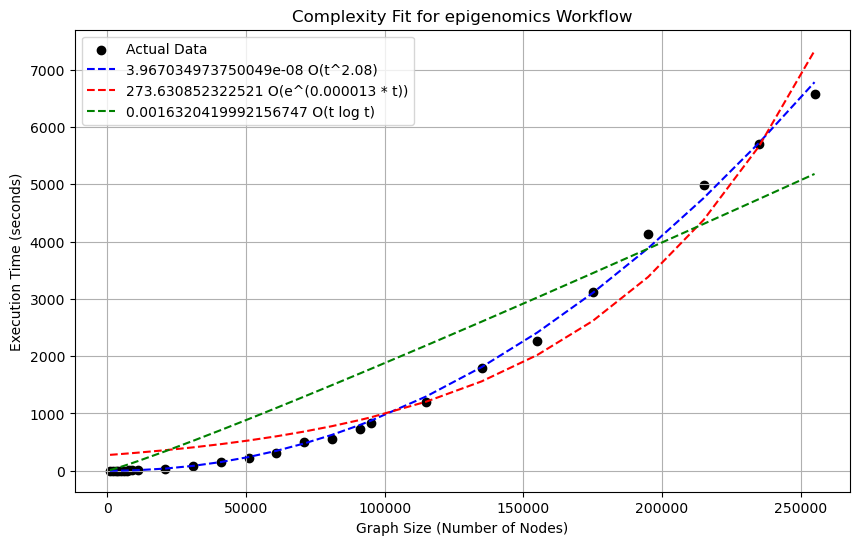

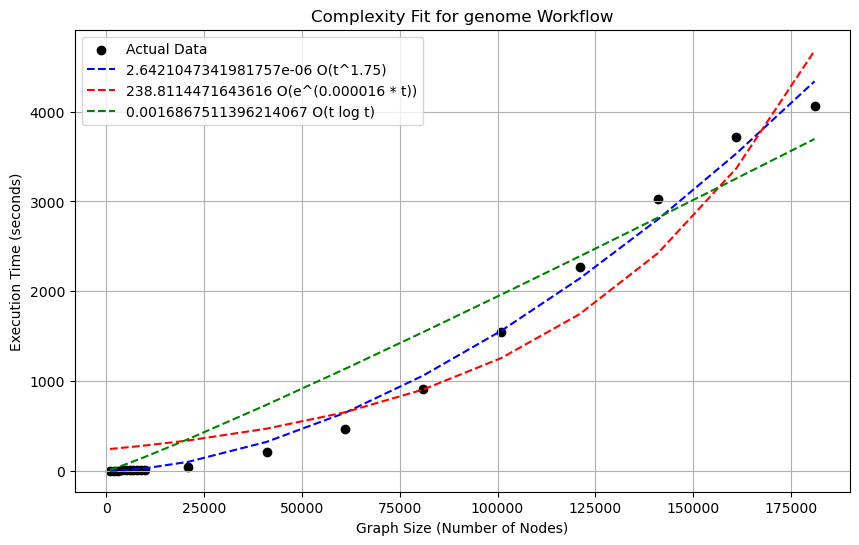

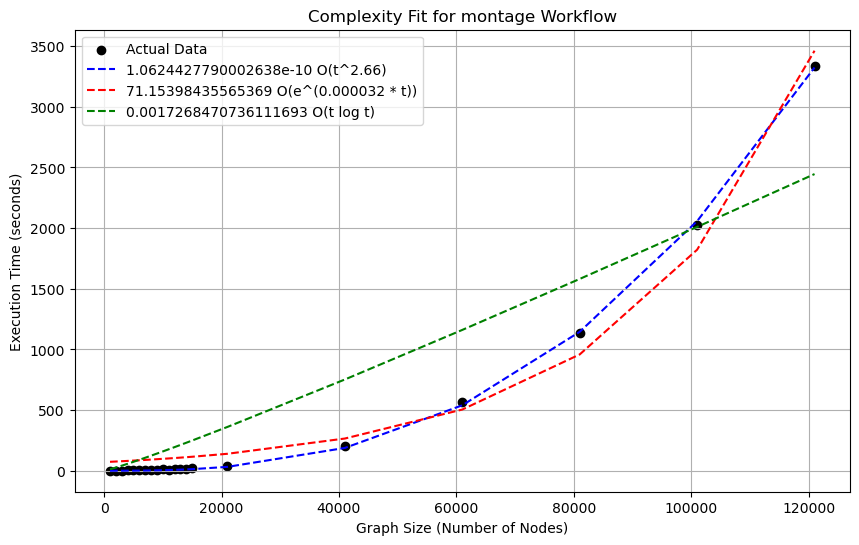

   workflow  best_fit                      power_law_O                         exponential_O                        n_log_n_O
epigenomics Power Law  3.967034973750049e-08 O(t^2.08)  273.630852322521 O(e^(0.000013 * t)) 0.0016320419992156747 O(t log t)
     genome Power Law 2.6421047341981757e-06 O(t^1.75) 238.8114471643616 O(e^(0.000016 * t)) 0.0016867511396214067 O(t log t)
    montage Power Law 1.0624427790002638e-10 O(t^2.66) 71.15398435565369 O(e^(0.000032 * t)) 0.0017268470736111693 O(t log t)


In [18]:
complexity_results = [fit_and_plot_complexity(df, workflow) for workflow in df["workflow"].unique()]
# Convert results to a Pandas DataFrame
df_complexity = pd.DataFrame([r for r in complexity_results if r is not None])

# Print results
print(df_complexity.to_string(index=False))

In [19]:
import json
import numpy as np
import pandas as pd
import re
import argparse
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define O(t log t) function
def t_log_t_fit(t, c):
    return c * t * np.log(t)


def t_linear_fit(t, c):
    return c * t

# Define O(t^2) function
def t_squared_fit(t, c):
    return c * np.power(t, 2)

# Define O(t^3) function
def t_cubed_fit(t, c):
    return c * np.power(t, 3)


def t_fourth_power_fit(t, c):
    return c * np.power(t, 4)


def t_exponential_fit(t, c):
    return c * np.power(2, t)

# Function to fit and compare models
def fit_and_plot_complexity(df, workflow_name):
    graph_sizes = df[df["workflow"] == workflow_name]["nodes"]
    exec_times = df[df["workflow"] == workflow_name]["exec_time"]

    # Ensure enough data points for fitting
    if len(graph_sizes) < 3:
        print(f"Skipping {workflow_name}: Insufficient data for fitting.")
        return None

    # Ensure enough data points for fitting
    if len(graph_sizes) < 3:
        print(f"Skipping {workflow_name}: Insufficient data for fitting.")
        return None

    # Fit O(t log t) model
    try:
        tlogt_params, _ = curve_fit(t_log_t_fit, graph_sizes, exec_times, p0=[1], maxfev=5000)
        estimated_c_tlogt = tlogt_params[0]
        tlogt_predictions = t_log_t_fit(graph_sizes, estimated_c_tlogt)
        tlogt_mse = np.mean((exec_times - tlogt_predictions) ** 2)
        tlogt_str = f"O(t log t) (c={estimated_c_tlogt:.6f})"
    except RuntimeError:
        tlogt_mse = np.inf
        tlogt_predictions = np.full_like(graph_sizes, np.nan)
        tlogt_str = "Fit Failed"

    # Fit O(t^2) model
    try:
        t2_params, _ = curve_fit(t_squared_fit, graph_sizes, exec_times, p0=[1], maxfev=5000)
        estimated_c_t2 = t2_params[0]
        t2_predictions = t_squared_fit(graph_sizes, estimated_c_t2)
        t2_mse = np.mean((exec_times - t2_predictions) ** 2)
        t2_str = f"O(t^2) (c={estimated_c_t2:.6f})"
    except RuntimeError:
        t2_mse = np.inf
        t2_predictions = np.full_like(graph_sizes, np.nan)
        t2_str = "Fit Failed"

    # Fit O(t^3) model
    try:
        t3_params, _ = curve_fit(t_cubed_fit, graph_sizes, exec_times, p0=[1], maxfev=5000)
        estimated_c_t3 = t3_params[0]
        t3_predictions = t_cubed_fit(graph_sizes, estimated_c_t3)
        t3_mse = np.mean((exec_times - t3_predictions) ** 2)
        t3_str = f"O(t^3) (c={estimated_c_t3:.6f})"
    except RuntimeError:
        t3_mse = np.inf
        t3_predictions = np.full_like(graph_sizes, np.nan)
        t3_str = "Fit Failed"

    # Determine the best fit based on MSE
    mse_values = {
        "T log T": tlogt_mse,
        "T^2": t2_mse,
        "T^3": t3_mse
    }
    best_fit = min(mse_values, key=mse_values.get)  # Select model with lowest MSE

    # 📊 PLOT THE RESULTS
    plt.figure(figsize=(10, 6))
    plt.scatter(graph_sizes, exec_times, label="Actual Data", color="black", marker="o")
    plt.plot(graph_sizes, tlogt_predictions, label=tlogt_str, linestyle="--", color="blue")
    plt.plot(graph_sizes, t2_predictions, label=t2_str, linestyle="--", color="red")
    plt.plot(graph_sizes, t3_predictions, label=t3_str, linestyle="--", color="green")

    plt.xlabel("Graph Size (Number of Nodes)")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Complexity Fit for {workflow_name} Workflow")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        "workflow": workflow_name,
        "best_fit": best_fit,
        "t_log_t_O": tlogt_str,
        "t_squared_O": t2_str,
        "t_cubed_O": t3_str
    }


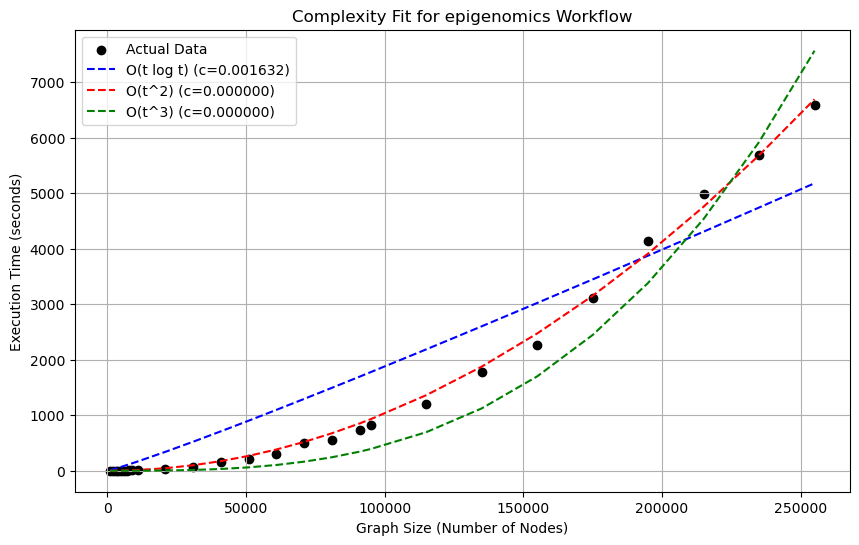

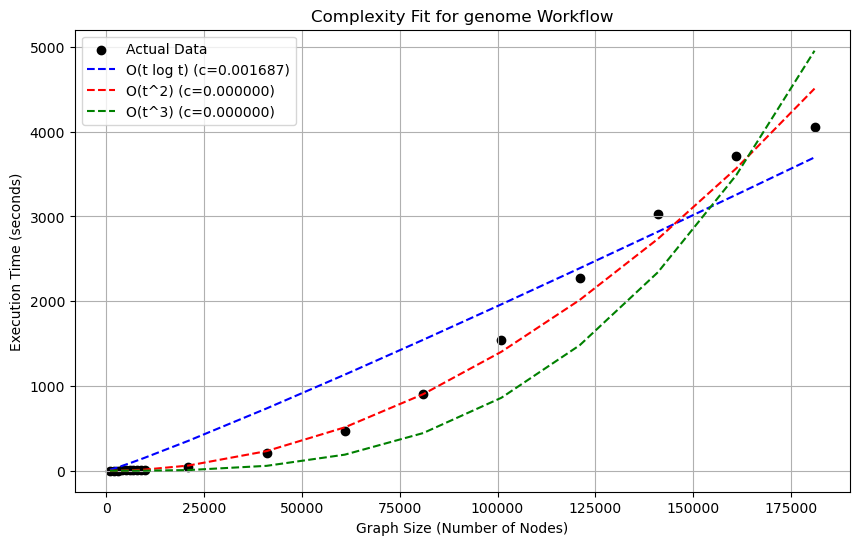

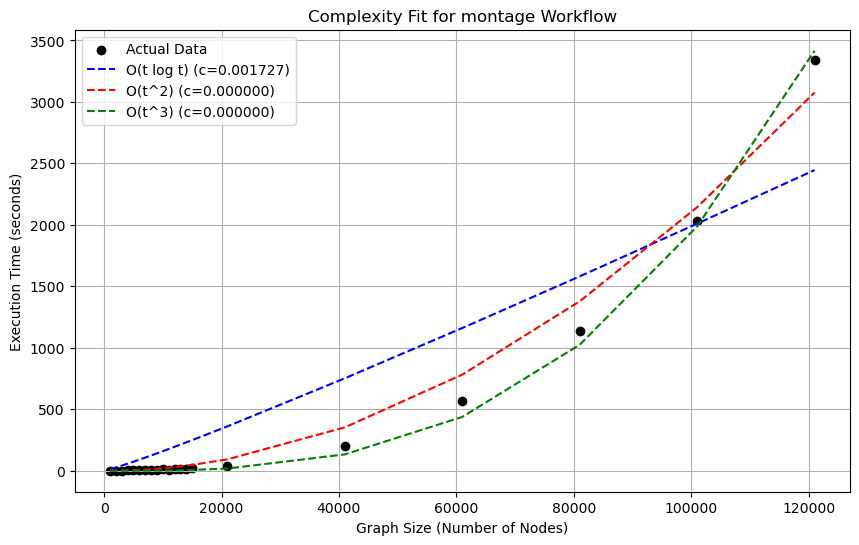

   workflow best_fit               t_log_t_O         t_squared_O           t_cubed_O
epigenomics      T^2 O(t log t) (c=0.001632) O(t^2) (c=0.000000) O(t^3) (c=0.000000)
     genome      T^2 O(t log t) (c=0.001687) O(t^2) (c=0.000000) O(t^3) (c=0.000000)
    montage      T^3 O(t log t) (c=0.001727) O(t^2) (c=0.000000) O(t^3) (c=0.000000)


In [20]:
complexity_results = [fit_and_plot_complexity(df, workflow) for workflow in df["workflow"].unique()]
# Convert results to a Pandas DataFrame
df_complexity = pd.DataFrame([r for r in complexity_results if r is not None])

# Print results
print(df_complexity.to_string(index=False))

In [21]:
import json
import numpy as np
import pandas as pd
import re
import argparse
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define complexity functions
def t_linear_fit(t, c):
    return c * t

def t_log_t_fit(t, c):
    return c * t * np.log(t)

def t_squared_fit(t, c):
    return c * np.power(t, 2)

def t_cubed_fit(t, c):
    return c * np.power(t, 3)

def t_fourth_power_fit(t, c):
    return c * np.power(t, 4)

def t_exponential_fit(t, c):
    return c * np.power(2, t)

# Function to fit and compare models
def fit_and_plot_complexity(df, workflow_name):
    graph_sizes = df[df["workflow"] == workflow_name]["nodes"]
    exec_times = df[df["workflow"] == workflow_name]["exec_time"]

    # Ensure enough data points for fitting
    if len(graph_sizes) < 3:
        print(f"Skipping {workflow_name}: Insufficient data for fitting.")
        return None

    # Dictionary to store fit results
    fit_results = {}

    # Complexity functions to test
    functions = {
        "T": t_linear_fit,
        "T log T": t_log_t_fit,
        "T^2": t_squared_fit,
        "T^3": t_cubed_fit,
        # "T^4": t_fourth_power_fit,
        # "2^T": t_exponential_fit
    }

    # Fit models and calculate MSE
    for label, func in functions.items():
        try:
            params, _ = curve_fit(func, graph_sizes, exec_times, p0=[1], maxfev=5000)
            estimated_c = params[0]
            predictions = func(graph_sizes, estimated_c)
            mse = np.mean((exec_times - predictions) ** 2)
            fit_results[label] = {
                "c": estimated_c,
                "mse": mse,
                "predictions": predictions,
                "equation": f"O({label}) (c={estimated_c:.6f})"
            }
        except RuntimeError:
            fit_results[label] = {
                "c": None,
                "mse": np.inf,
                "predictions": np.full_like(graph_sizes, np.nan),
                "equation": "Fit Failed"
            }

    # Determine the best fit based on MSE
    best_fit = min(fit_results, key=lambda x: fit_results[x]["mse"])

    # 📊 PLOT THE RESULTS
    plt.figure(figsize=(10, 6))
    plt.scatter(graph_sizes, exec_times, label="Actual Data", color="black", marker="o")

    colors = ["blue", "red", "green", "purple", "orange", "brown"]
    for (label, result), color in zip(fit_results.items(), colors):
        plt.plot(graph_sizes, result["predictions"], label=result["equation"], linestyle="--", color=color)

    plt.xlabel("Graph Size (Number of Nodes)")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Complexity Fit for {workflow_name} Workflow")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return results
    return {
        "workflow": workflow_name,
        "best_fit": best_fit,
        **{label: result["equation"] for label, result in fit_results.items()}
    }

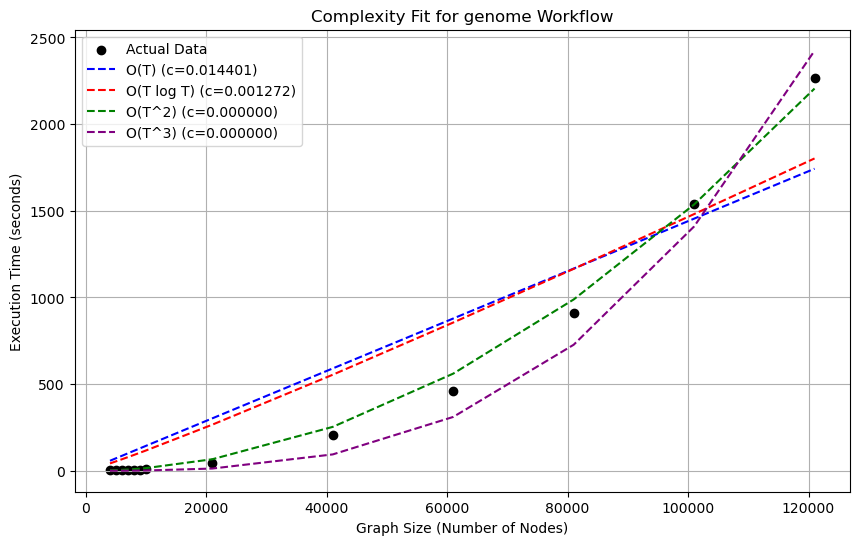

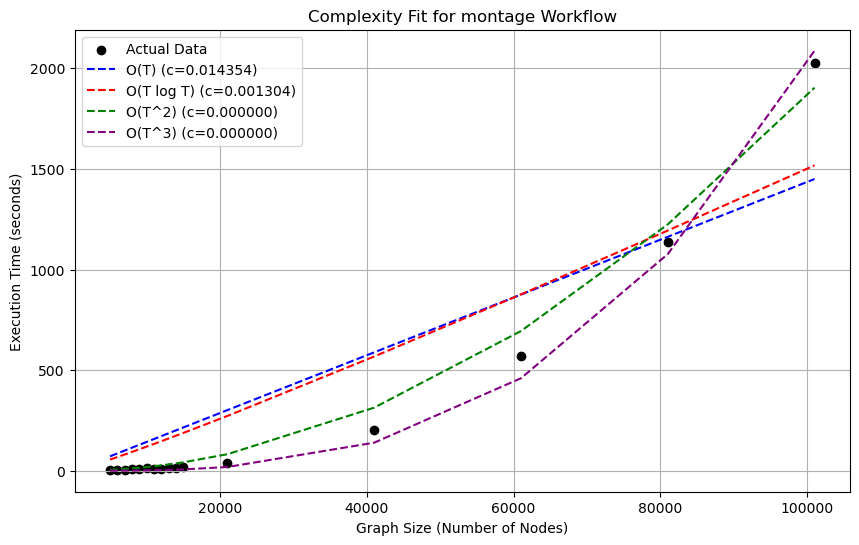

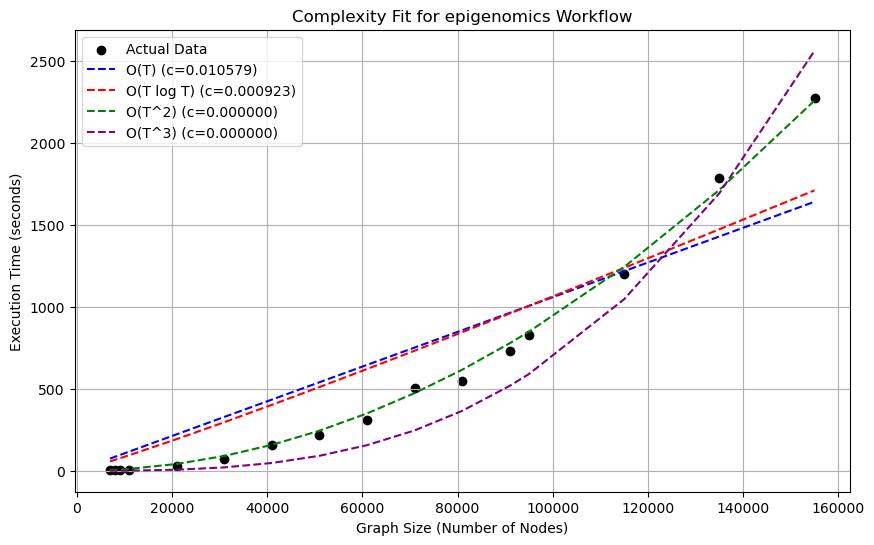

   workflow best_fit                 T                 T log T                 T^2                 T^3
     genome      T^2 O(T) (c=0.014401) O(T log T) (c=0.001272) O(T^2) (c=0.000000) O(T^3) (c=0.000000)
    montage      T^3 O(T) (c=0.014354) O(T log T) (c=0.001304) O(T^2) (c=0.000000) O(T^3) (c=0.000000)
epigenomics      T^2 O(T) (c=0.010579) O(T log T) (c=0.000923) O(T^2) (c=0.000000) O(T^3) (c=0.000000)


In [26]:
for scheduler in df.scheduler.unique():
    

    complexity_results = [fit_and_plot_complexity(df, workflow) for workflow in df["workflow"].unique()]
    # Convert results to a Pandas DataFrame
    df_complexity = pd.DataFrame([r for r in complexity_results if r is not None])
    
    # Print results
    print(df_complexity.to_string(index=False))

In [23]:
df.exec_time.max()


6584.642278402

In [24]:
df[(df["exec_time"] < 3000) & (df["exec_time"] > 5)]

,dag,system,scheduler,completed,makespan,exec_time,run_stats.scheduling_time,run_stats.total_task_time,run_stats.total_network_traffic,run_stats.total_network_time,...,run_stats.max_memory_utilization,run_stats.cpu_utilization,run_stats.memory_utilization,run_stats.used_resource_count,run_stats.cpu_utilization_used,run_stats.memory_utilization_used,run_stats.cpu_utilization_active,run_stats.memory_utilization_active,nodes,workflow
46,6000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,3.031582e+04,5.126032,2.839814,9.796318e+05,6.416751e+06,516.755181,...,0.0,0.125736,0.0,33,0.125736,0.0,0.126336,0.0,6000,genome
52,7000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,3.574943e+04,5.216969,3.352706,1.156319e+06,7.517895e+06,605.440778,...,0.0,0.125856,0.0,33,0.125856,0.0,0.126536,0.0,7000,genome
57,8000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,3.375950e+05,6.465591,3.353820,2.961832e+06,6.743753e+05,57.352924,...,0.0,0.034137,0.0,33,0.034137,0.0,0.034177,0.0,8000,montage
56,8000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,4.037620e+04,7.074279,4.572342,1.300901e+06,8.487827e+06,683.797868,...,0.0,0.125368,0.0,33,0.125368,0.0,0.126078,0.0,8000,genome
61,9000-epigenomics-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,1.655808e+04,5.300261,3.716954,5.087998e+05,1.951240e+05,18.337016,...,0.0,0.119565,0.0,33,0.119565,0.0,0.123276,0.0,9000,epigenomics
63,9000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,1.124033e+05,8.602533,5.032974,3.110938e+06,7.662687e+05,65.079398,...,0.0,0.107691,0.0,33,0.107691,0.0,0.119945,0.0,9000,montage
62,9000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,4.531467e+04,6.892573,4.731282,1.467167e+06,9.704452e+06,781.678595,...,0.0,0.125982,0.0,33,0.125982,0.0,0.126613,0.0,9000,genome
66,9900-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,4.977062e+04,8.482738,6.108882,1.602738e+06,1.056175e+07,850.839962,...,0.0,0.125302,0.0,33,0.125302,0.0,0.125771,0.0,9900,genome
3,10000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,4.623828e+04,11.516822,6.088867,3.339446e+06,8.800677e+05,74.689816,...,0.0,0.281022,0.0,33,0.281022,0.0,0.283348,0.0,10000,montage
7,11000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,9.888161e+04,9.197203,5.905539,3.751773e+06,8.994974e+05,76.504590,...,0.0,0.147635,0.0,33,0.147635,0.0,0.154349,0.0,11000,montage


soykb takes wayyyy too long. Better off removing from this test for the sake of saving time

In [25]:
df = df[(df["exec_time"] < 3000) & (df["exec_time"] > 3)]